In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [63]:
!rm pred_2020_12_11.npz
!wget https://jpata.web.cern.ch/jpata/mlpf/test_data/pred_2020_12_11.npz

--2020-12-11 15:10:11--  https://jpata.web.cern.ch/jpata/mlpf/test_data/pred_2020_12_11.npz
Resolving jpata.web.cern.ch (jpata.web.cern.ch)... 137.138.31.235, 188.185.90.87, 188.185.87.216, ...
Connecting to jpata.web.cern.ch (jpata.web.cern.ch)|137.138.31.235|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69632996 (66M)
Saving to: ‘pred_2020_12_11.npz’

pred_2020_12_11.npz 100%[===================>]  66.41M  11.2MB/s    in 5.8s    

2020-12-11 15:10:17 (11.5 MB/s) - ‘pred_2020_12_11.npz’ saved [69632996/69632996]



In [65]:
fi = np.load("pred_2020_12_11.npz")
ygen = fi["ygen"]
ycand = fi["ycand"]
ypred = fi["ypred"]
ypred_raw = fi["ypred_raw"]

In [66]:
ygen.shape

(100, 5120, 7)

We have 100 events, up to 5120 particles in each event, 7 features per particle. We have 3 types of data matrices for each event:
- ygen - ground truth from the generator
- ypred - prediction from the MLPF model
- ycand - prediction from the standard DelphesPF algorithm

In [67]:
#features are (particle ID, charge, pT, eta, sin phi, cos phi, energy)
ygen[0, 0]

array([1.        , 1.        , 1.8491102 , 1.6624558 , 0.8034702 ,
       0.59534496, 5.05177   ], dtype=float32)

In [68]:
#Same for the prediction
ypred[0, 0]

array([ 1.        ,  0.85946208,  1.68955398,  1.67227876,  0.79879701,
        0.5905838 , -1.8718394 ])

In [69]:
#particle ID (type is)
#0 - no particle
#1 - charged hadron
#2 - neutral hadron
#3 - photon
#4 - electron
#5 - muon
np.unique(ygen[:, :, 0], return_counts=True)

(array([0., 1., 2., 3., 4., 5.], dtype=float32),
 array([ 50421, 313620,  26770, 120023,    900,    266]))

In [70]:
#We also have the raw logits for the multiclass ID prediction
ypred_raw.shape

(100, 5120, 6)

Text(0, 0.5, 'phi')

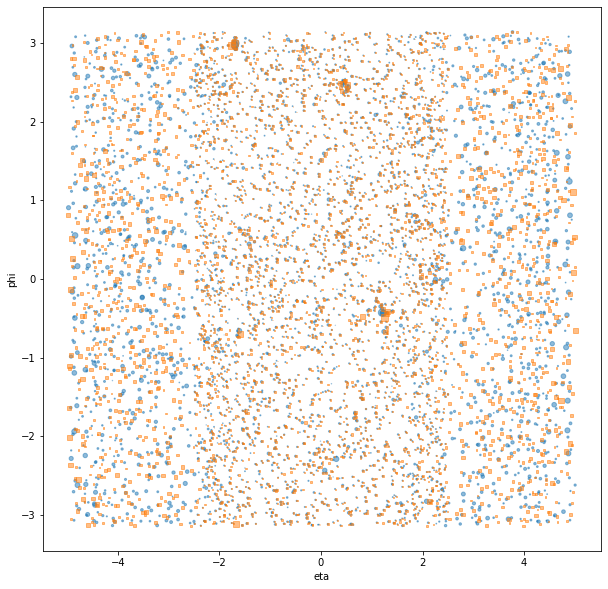

In [61]:
#Ground truth vs model prediction particles
plt.figure(figsize=(10,10))


ev = ygen[0, :]
msk = ev[:, 0]!=0
plt.scatter(ev[msk, 3], np.arctan2(ev[msk, 4], ev[msk, 5]), s=2*ev[msk, 2], marker="o", alpha=0.5)

ev = ypred[0, :]
msk = ev[:, 0]!=0
plt.scatter(ev[msk, 3], np.arctan2(ev[msk, 4], ev[msk, 5]), s=2*ev[msk, 2], marker="s", alpha=0.5)

plt.xlabel("eta")
plt.ylabel("phi")